90      10.0
91    50-120
92    50-300
93      20.0
94     20-30
95        10
96      75.0
97      30.0
98     14-15
99     10-30
Name: Size (nm), dtype: object
40-70


C:\Users\015025631\AppData\Local\Temp\ipykernel_49740\3442646530.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = np.mean([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])
C:\Users\015025631\AppData\Local\Temp\ipykernel_49740\3442646530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = np.std([float(df['size(nm)'][i].split('-')[0]),float(df['size(nm)'][i].split('-')[1])])


9


C:\Users\015025631\AppData\Local\Temp\ipykernel_49740\3442646530.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = float(df['size(nm)'][i])
C:\Users\015025631\AppData\Local\Temp\ipykernel_49740\3442646530.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = 0


50-300
60.0


C:\Users\015025631\AppData\Local\Temp\ipykernel_49740\3442646530.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_mean'][i] = df['size(nm)'][i]
C:\Users\015025631\AppData\Local\Temp\ipykernel_49740\3442646530.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size_std'][i] = 0


10.0
40-300
80.0
9.0
25.0
100-300
8-12
8-10
35-165
300-500
20-40
20-320
8-22
90.0
40-120
7-11
10.0
8-12
5-8
7.0
20.0
10.0
10.0
8-15
8-11
10.0
20-40
20-40
20-40
50-100
20-100
10.0
20.0
10
10.0
65-400
20-50
200-400
20-50
20-50
50-200
10-15
8-14
7-12
9
8-20
20-100
10.0
10-20
50-70
50-100
10-15
9.0
10.0
50.0
30-50
10.0
8-10
10.0
5-30
5-10
50-400
60-300
100.0
15.0
100.0
50.0
15.0
10-70
10.0
60.0
7-11
20-90
10
50.0
120
10.0
10.0
10
7-10
50.0
7-10
20.0
9.0
20-50
50-300
10.0
50-120
50-300
20.0
20-30
10
75.0
30.0
14-15
10-30
4-10
8-20
120.0
20.0
10-50
8
10.0
11.0
5-8
20.0
10-12
20-40
25-30
10-20
10.0
nan
nan
8-15
nan
10-7
10-100
10
Normalizando ...
Falha: what_washed <class 'str'>
Falha: morpho <class 'str'>
Falha: size(nm) <class 'str'>


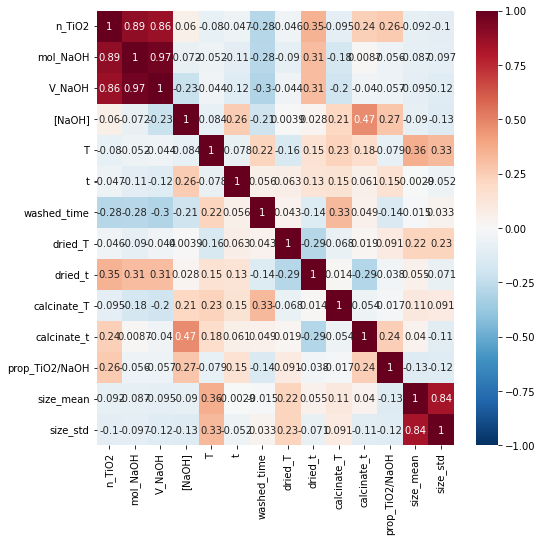

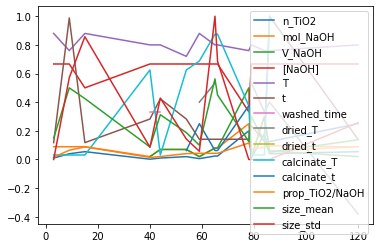

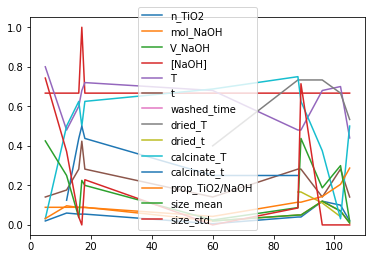

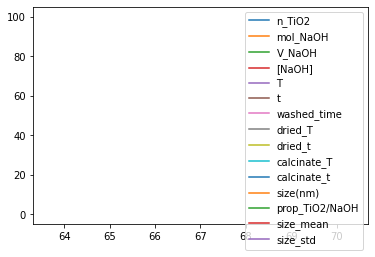

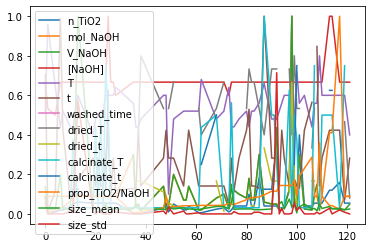

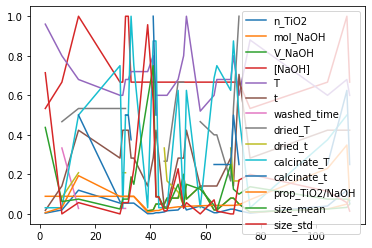

(24, 3) (94, 3)
0.016129165380276485
0.013257776873945927


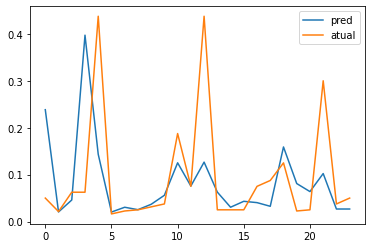

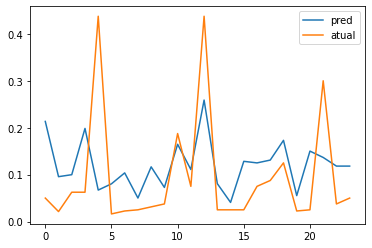

In [1]:
%run "nanosize_reg.ipynb"

## Configurando Hiperparâmetros

In [2]:

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressorRF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 11,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [3]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 50, stop = 70, num = 1)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [3, 4,5]

min_samples_leaf = [3,4,5]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [3, 4, 5],
 'n_estimators': [50]}


In [4]:
rf_random = RandomizedSearchCV(estimator = regressorRF, param_distributions = random_grid, n_iter = 60, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=11,
                                                   random_state=42),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [3, 4, 5],
                                        'n_estimators': [50]},
                   random_state=42, verbose=2)

In [5]:
print(rf_random.best_params_)

{'n_estimators': 50, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}


In [6]:
mybparam=[v for v in rf_random.best_params_.values()]

aplicando...

In [7]:
regressorRF = RandomForestRegressor(n_estimators=mybparam[0],
                                    min_samples_split= mybparam[1],
                                    min_samples_leaf= mybparam[2],
                                    max_features=mybparam[3],
                                    max_depth= mybparam[4],
                                    bootstrap=False) 
regressorRF.fit(x_train, y_train)
previsao1 = regressorRF.predict(x_test)
print('Erro quadrátio médio: {}'.format(mean_squared_error(y_test, previsao1)))
combined1 = np.concatenate((previsao1.reshape(len(previsao1),1), y_test.reshape(len(y_test),1)),1)
#combined.columns = ["actual", "predictions"]
compara1 = pd.DataFrame(combined1,columns=['pred','atual'])
fig = px.line(compara1, x=compara1.index, y=['atual','pred'])
fig.show() 

Erro quadrátio médio: 0.0104226929098535
